DataSet Name:- WineQuality-white.csv

DataSet Description Link:- https://archive.ics.uci.edu/ml/datasets/Wine+Quality

DataSet Download Link:- https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

DataSet Description:-

Attribute Description:- Input variables (based on physicochemical tests): 1 - fixed acidity 2 - volatile acidity 3 - citric acid 4 - residual sugar 5 - chlorides 6 - free sulfur dioxide 7 - total sulfur dioxide 8 - density 9 - pH 10 - sulphates 11 - alcohol Output variable (based on sensory data): 12 - quality (score between 0 and 10)

Aim:-Implement various knn classification algorithms and do prediction for unknown data

In [1]:
#import and initialize section
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

fileName = 'winequality.csv'

knn = KNeighborsClassifier(n_neighbors = 5)
df = pd.read_csv(fileName)

df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
#preprocessing section
x = df.iloc[:,:-1].values
y = df.iloc[:,11].values

#X contains the input datas(menntioned above in dataDiscription)
x

array([[ 7.  ,  0.27,  0.36, ...,  3.  ,  0.45,  8.8 ],
       [ 6.3 ,  0.3 ,  0.34, ...,  3.3 ,  0.49,  9.5 ],
       [ 8.1 ,  0.28,  0.4 , ...,  3.26,  0.44, 10.1 ],
       ...,
       [ 6.3 ,  0.2 ,  0.4 , ...,  3.46,  0.5 , 11.4 ],
       [ 5.9 ,  0.26,  0.27, ...,  3.35,  0.44,  9.4 ],
       [ 6.4 ,  0.19,  0.42, ...,  3.3 ,  0.41, 11.7 ]])

In [3]:
#Y conatins the values of output column (mentioned above in dataDiscription)
y

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 7, 5, 7, 6, 8, 6, 5, 8, 7,
       8, 5, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6,
       6, 7, 4, 5, 6, 5, 6, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5,
       7, 5, 8, 5, 6, 5, 5, 6, 8, 5, 7, 7, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6,
       5, 6, 6, 5, 7, 7, 7, 6, 6, 7, 4, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5,
       6, 5, 5, 5, 5, 4, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 5, 7, 7, 6, 5, 7,
       5, 5, 5, 5, 6, 5, 7, 6, 5, 5, 6, 6, 6, 6, 6, 4, 7, 6, 7, 6, 6, 5,
       6, 6, 6, 7, 8, 8, 7, 5, 5, 6, 5, 5, 6, 7, 5, 5, 6, 6, 4, 7, 5, 6,
       4, 5, 4, 6, 6, 5, 5, 6, 5, 5, 6, 5, 8, 4, 6, 5, 6, 5, 5, 6, 5, 5,
       5, 5, 5, 5, 5, 6, 4, 5, 5, 4, 5, 6, 5, 7, 5, 6, 7, 5, 5, 5, 5, 5,
       5, 6, 7, 6, 6, 5, 6, 6, 6, 5, 4, 6, 6, 6, 6, 6, 6, 6, 7, 6, 5, 5,
       7, 6, 5, 6, 7, 7, 7, 5, 4, 3, 5, 3, 6, 8, 7, 7, 6, 4, 6, 5, 5, 6,
       6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 6, 5, 4, 7, 8, 8, 4, 5, 5, 5,
       6, 7, 7, 7, 7, 6, 5, 7, 3, 6, 5, 7, 6, 6, 6,

In [4]:
#spliting the data  between train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.20,random_state = 0)
#the size of test is 20% of testing and 80% of training from our dataset

In [5]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [6]:
knn.score(X_test,Y_test)

0.5

In [7]:
#helper function to bin the target variable
## binnning the quality (as an output column into 0,1,2)
def helper(row):
    if row.quality < 4.5:
        return 0
    elif row.quality < 6.5 and row.quality >4.5:
        return 1
    else:
        return 2
df["quality"] = df.apply(helper,axis=1)
df['quality'].value_counts()

1    305
2     77
0     18
Name: quality, dtype: int64

In [8]:
X = df.drop('quality',axis=1)
Y = df[['quality']]
print(X.columns)
print(Y.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
Index(['quality'], dtype='object')


In [9]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,400.0,6.820000,0.768881,5.0000,6.3000,6.8000,7.2000,10.200
volatile acidity,400.0,0.290050,0.107739,0.1000,0.2300,0.2700,0.3300,0.905
citric acid,400.0,0.342275,0.121425,0.0000,0.2700,0.3400,0.4000,0.880
residual sugar,400.0,6.763250,5.316957,0.8000,1.6000,5.4000,10.5000,22.000
chlorides,400.0,0.048332,0.020302,0.0200,0.0380,0.0450,0.0530,0.200
free sulfur dioxide,400.0,37.232500,16.852922,3.0000,25.0000,36.0000,48.0000,131.000
total sulfur dioxide,400.0,146.466250,44.036434,47.0000,114.0000,147.0000,173.2500,313.000
density,400.0,0.994495,0.002736,0.9892,0.9923,0.9941,0.9969,1.001
pH,400.0,3.205550,0.148374,2.8700,3.1100,3.2000,3.3000,3.720
sulphates,400.0,0.479125,0.101958,0.2700,0.4000,0.4600,0.5400,0.850


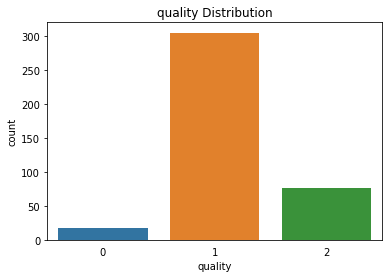

In [10]:
#distribution of quality
ax = sns.countplot(data=df,x='quality')
ax.set(xticklabels=['0','1','2'],title='quality Distribution')
ax.tick_params(bottom=False)

As we can see in the above graph we can conclude that our most of data from quality column tends to the range "4.5 - 6.5".

the second big group is more than "6.5 values"
and last group is less than "4.5" values

we can distribute it as bad,average and great quality of wine(white)

In [11]:
!pip install -U seaborn

Requirement already up-to-date: seaborn in c:\users\lenovo\anaconda3\lib\site-packages (0.11.2)


Text(0, 0.5, '')

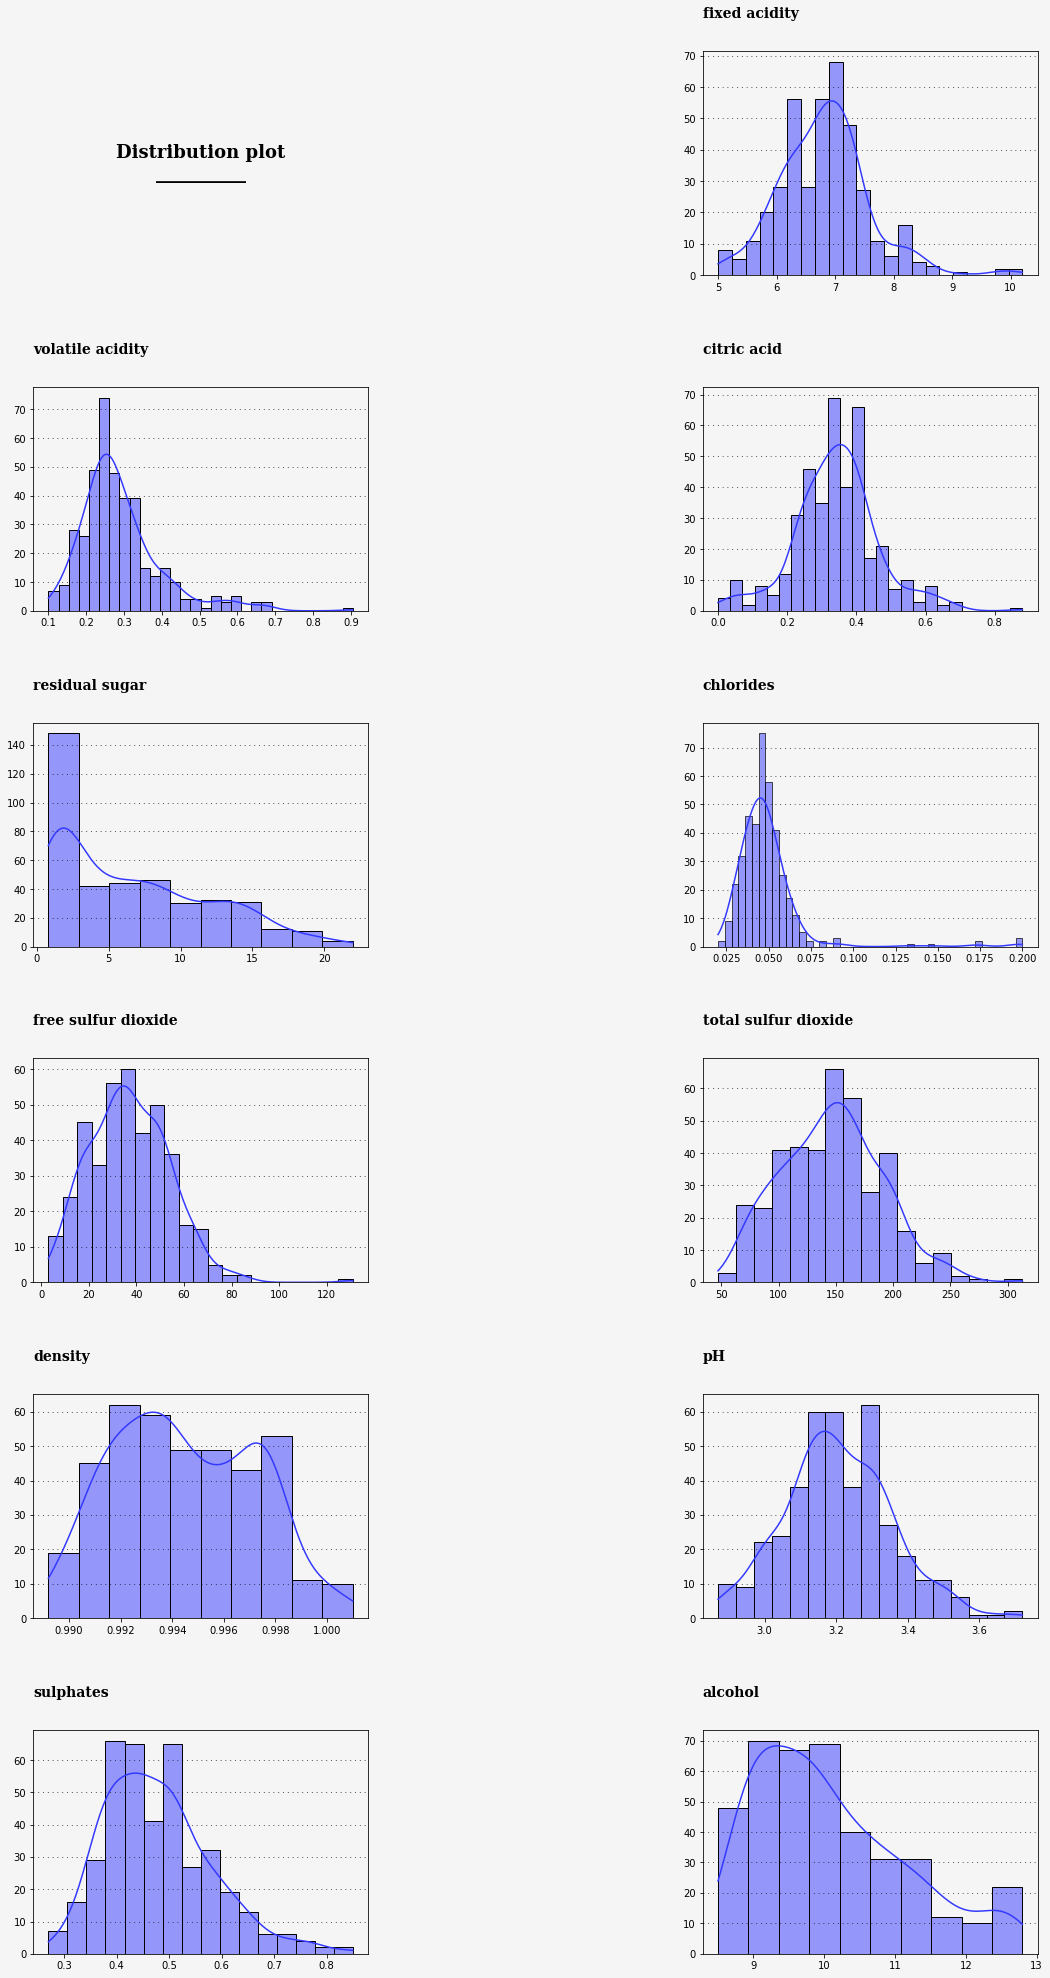

In [12]:

fig = plt.figure(figsize=(18,35))
gs = fig.add_gridspec(6,2)
gs.update(wspace=1, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
ax10 = fig.add_subplot(gs[5,0])
ax11 = fig.add_subplot(gs[5,1])

background_color = "#f6f5f5"
color_palette = ["#FA5458","#FDD563","#5F63F1"]

fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color) 
ax9.set_facecolor(background_color) 
ax10.set_facecolor(background_color) 
ax11.set_facecolor(background_color) 


# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Distribution plot\n__________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(data=df['fixed acidity'],ax=ax1,x=df['fixed acidity'],color= "#3339FF", kde=True)
Xstart, Xend = ax1.get_xlim()
Ystart, Yend = ax1.get_ylim()
ax1.text(Xstart, Yend+(Yend*0.15), 'fixed acidity', fontsize=14, fontweight='bold', fontfamily='serif')
ax1.set_xlabel("")
ax1.set_ylabel("")

ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax2,x=df['volatile acidity'],color= "#3339FF", kde=True)
Xstart, Xend = ax2.get_xlim()
Ystart, Yend = ax2.get_ylim()
ax2.text(Xstart, Yend+(Yend*0.15), 'volatile acidity', fontsize=14, fontweight='bold', fontfamily='serif')
ax2.set_xlabel("")
ax2.set_ylabel("")

ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax3,x=df['citric acid'],color= "#3339FF", kde=True)
Xstart, Xend = ax3.get_xlim()
Ystart, Yend = ax3.get_ylim()
ax3.text(Xstart, Yend+(Yend*0.15), 'citric acid', fontsize=14, fontweight='bold', fontfamily='serif')
ax3.set_xlabel("")
ax3.set_ylabel("")

ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax4,x=df['residual sugar'],color= "#3339FF", kde=True)
Xstart, Xend = ax4.get_xlim()
Ystart, Yend = ax4.get_ylim()
ax4.text(Xstart, Yend+(Yend*0.15), 'residual sugar', fontsize=14, fontweight='bold', fontfamily='serif')
ax4.set_xlabel("")
ax4.set_ylabel("")

ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax5,x=df['chlorides'],color= "#3339FF", kde=True)
Xstart, Xend = ax5.get_xlim()
Ystart, Yend = ax5.get_ylim()
ax5.text(Xstart, Yend+(Yend*0.15), 'chlorides', fontsize=14, fontweight='bold', fontfamily='serif')
ax5.set_xlabel("")
ax5.set_ylabel("")

ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax6,x=df['free sulfur dioxide'],color= "#3339FF", kde=True)
Xstart, Xend = ax6.get_xlim()
Ystart, Yend = ax6.get_ylim()
ax6.text(Xstart, Yend+(Yend*0.15), 'free sulfur dioxide', fontsize=14, fontweight='bold', fontfamily='serif')
ax6.set_xlabel("")
ax6.set_ylabel("")

ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax7,x=df['total sulfur dioxide'],color= "#3339FF", kde=True)
Xstart, Xend = ax7.get_xlim()
Ystart, Yend = ax7.get_ylim()
ax7.text(Xstart, Yend+(Yend*0.15), 'total sulfur dioxide', fontsize=14, fontweight='bold', fontfamily='serif')
ax7.set_xlabel("")
ax7.set_ylabel("")

ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax8,x=df['density'],color= "#3339FF", kde=True)
Xstart, Xend = ax8.get_xlim()
Ystart, Yend = ax8.get_ylim()
ax8.text(Xstart, Yend+(Yend*0.15), 'density', fontsize=14, fontweight='bold', fontfamily='serif')
ax8.set_xlabel("")
ax8.set_ylabel("")

ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax9,x=df['pH'],color= "#3339FF", kde=True)
Xstart, Xend = ax9.get_xlim()
Ystart, Yend = ax9.get_ylim()
ax9.text(Xstart, Yend+(Yend*0.15), 'pH', fontsize=14, fontweight='bold', fontfamily='serif')
ax9.set_xlabel("")
ax9.set_ylabel("")

ax10.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax10,x=df['sulphates'],color= "#3339FF", kde=True)
Xstart, Xend = ax10.get_xlim()
Ystart, Yend = ax10.get_ylim()
ax10.text(Xstart, Yend+(Yend*0.15), 'sulphates', fontsize=14, fontweight='bold', fontfamily='serif')
ax10.set_xlabel("")
ax10.set_ylabel("")

ax11.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax11,x=df['alcohol'],color= "#3339FF", kde=True)
Xstart, Xend = ax11.get_xlim()
Ystart, Yend = ax11.get_ylim()
ax11.text(Xstart, Yend+(Yend*0.15), 'alcohol', fontsize=14, fontweight='bold', fontfamily='serif')
ax11.set_xlabel("")
ax11.set_ylabel("")


Non of the features Seems to be skewed.
Residual Sugar and Chlorides seems to be a little bit right skewed,
but not much-can be ignored

Text(0, 0.5, '')

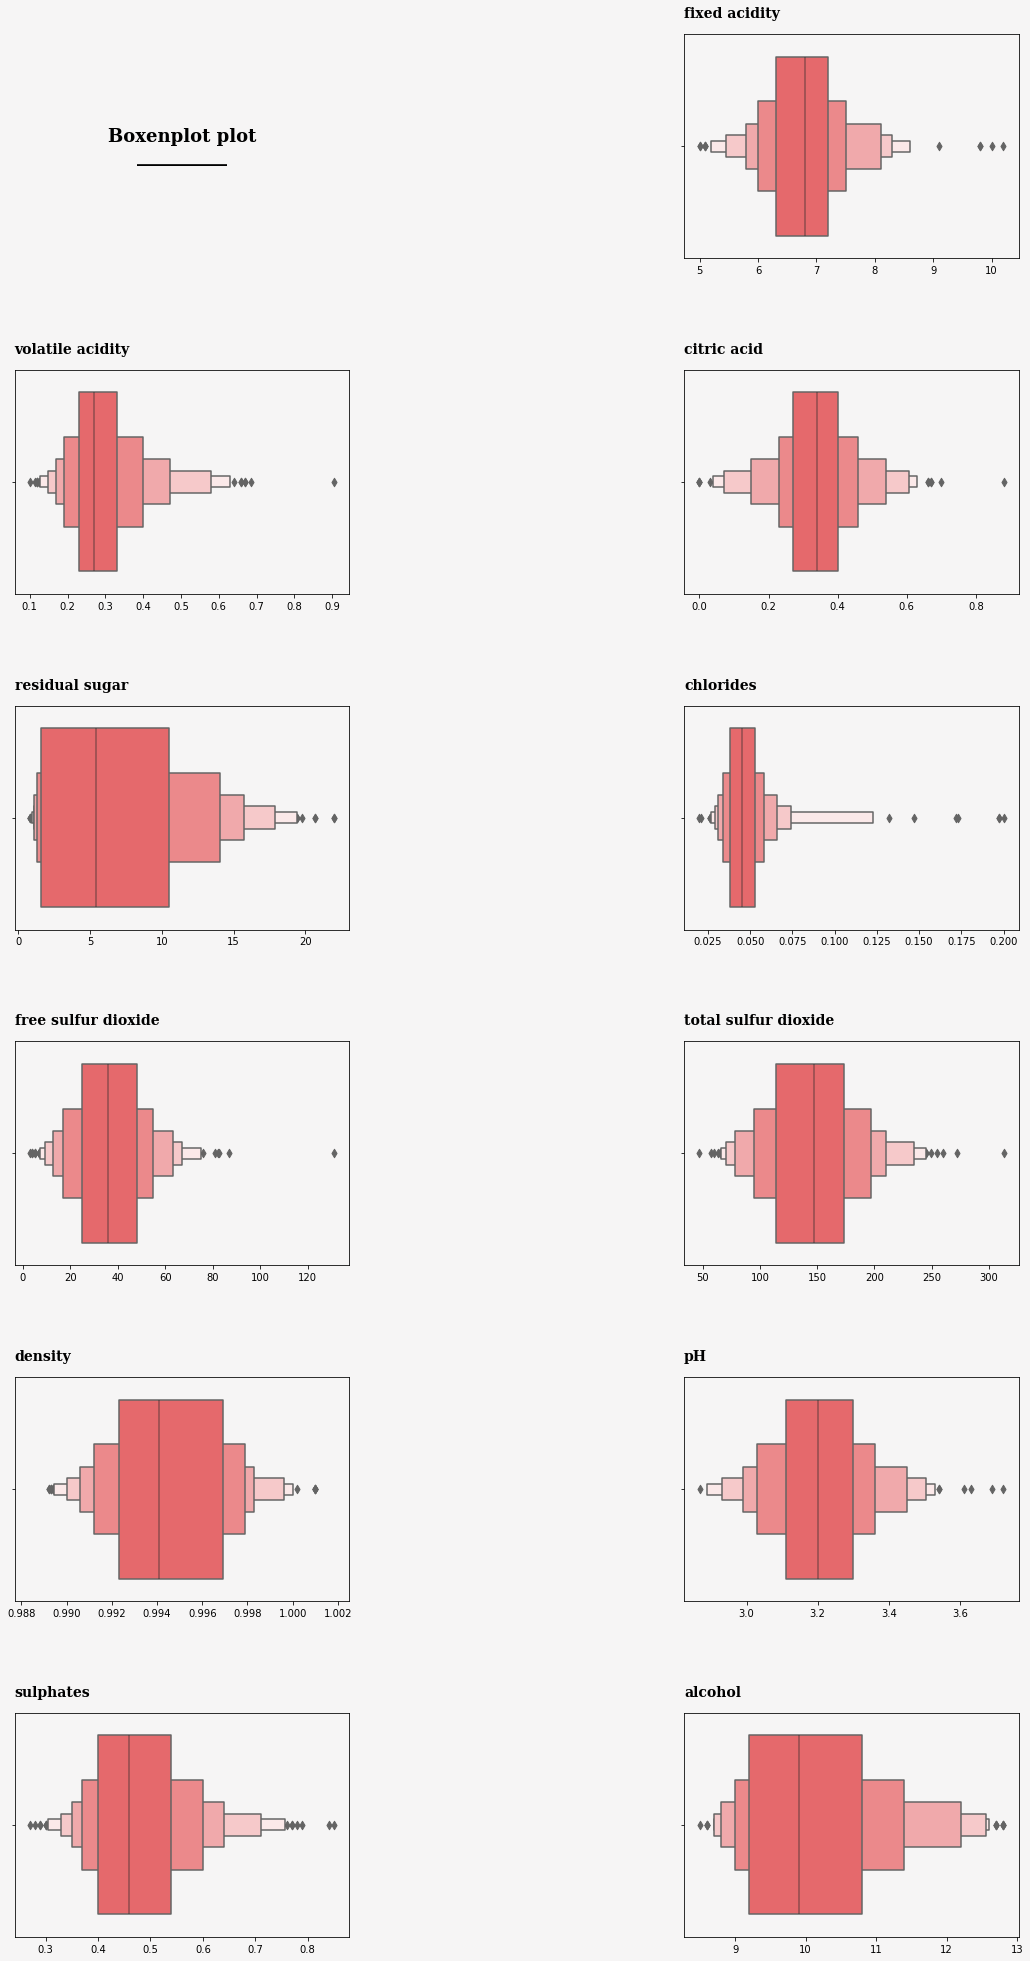

In [13]:
fig = plt.figure(figsize=(18,35))
gs = fig.add_gridspec(6,2)
gs.update(wspace=1, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
ax10 = fig.add_subplot(gs[5,0])
ax11 = fig.add_subplot(gs[5,1])

background_color = "#f6f5f5"
color_palette = ["#FA5458","#FDD563","#5F63F1"]

fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color) 
ax9.set_facecolor(background_color) 
ax10.set_facecolor(background_color) 
ax11.set_facecolor(background_color) 


# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Boxenplot plot\n__________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,x=df['fixed acidity'],color= "#FA5458")
Xstart, Xend = ax1.get_xlim()
Ystart, Yend = ax1.get_ylim()
ax1.text(Xstart, Yend+(Yend*0.15), 'fixed acidity', fontsize=14, fontweight='bold', fontfamily='serif')
ax1.set_xlabel("")
ax1.set_ylabel("")

ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,x=df['volatile acidity'],color= "#FA5458")
Xstart, Xend = ax2.get_xlim()
Ystart, Yend = ax2.get_ylim()
ax2.text(Xstart, Yend+(Yend*0.15), 'volatile acidity', fontsize=14, fontweight='bold', fontfamily='serif')
ax2.set_xlabel("")
ax2.set_ylabel("")

ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,x=df['citric acid'],color= "#FA5458")
Xstart, Xend = ax3.get_xlim()
Ystart, Yend = ax3.get_ylim()
ax3.text(Xstart, Yend+(Yend*0.15), 'citric acid', fontsize=14, fontweight='bold', fontfamily='serif')
ax3.set_xlabel("")
ax3.set_ylabel("")

ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,x=df['residual sugar'],color= "#FA5458")
Xstart, Xend = ax4.get_xlim()
Ystart, Yend = ax4.get_ylim()
ax4.text(Xstart, Yend+(Yend*0.15), 'residual sugar', fontsize=14, fontweight='bold', fontfamily='serif')
ax4.set_xlabel("")
ax4.set_ylabel("")

ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,x=df['chlorides'],color= "#FA5458")
Xstart, Xend = ax5.get_xlim()
Ystart, Yend = ax5.get_ylim()
ax5.text(Xstart, Yend+(Yend*0.15), 'chlorides', fontsize=14, fontweight='bold', fontfamily='serif')
ax5.set_xlabel("")
ax5.set_ylabel("")

ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax6,x=df['free sulfur dioxide'],color= "#FA5458")
Xstart, Xend = ax6.get_xlim()
Ystart, Yend = ax6.get_ylim()
ax6.text(Xstart, Yend+(Yend*0.15), 'free sulfur dioxide', fontsize=14, fontweight='bold', fontfamily='serif')
ax6.set_xlabel("")
ax6.set_ylabel("")

ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax7,x=df['total sulfur dioxide'],color= "#FA5458")
Xstart, Xend = ax7.get_xlim()
Ystart, Yend = ax7.get_ylim()
ax7.text(Xstart, Yend+(Yend*0.15), 'total sulfur dioxide', fontsize=14, fontweight='bold', fontfamily='serif')
ax7.set_xlabel("")
ax7.set_ylabel("")

ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax8,x=df['density'],color= "#FA5458")
Xstart, Xend = ax8.get_xlim()
Ystart, Yend = ax8.get_ylim()
ax8.text(Xstart, Yend+(Yend*0.15), 'density', fontsize=14, fontweight='bold', fontfamily='serif')
ax8.set_xlabel("")
ax8.set_ylabel("")

ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax9,x=df['pH'],color= "#FA5458")
Xstart, Xend = ax9.get_xlim()
Ystart, Yend = ax9.get_ylim()
ax9.text(Xstart, Yend+(Yend*0.15), 'pH', fontsize=14, fontweight='bold', fontfamily='serif')
ax9.set_xlabel("")
ax9.set_ylabel("")

ax10.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax10,x=df['sulphates'],color= "#FA5458")
Xstart, Xend = ax10.get_xlim()
Ystart, Yend = ax10.get_ylim()
ax10.text(Xstart, Yend+(Yend*0.15), 'sulphates', fontsize=14, fontweight='bold', fontfamily='serif')
ax10.set_xlabel("")
ax10.set_ylabel("")

ax11.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax11,x=df['alcohol'],color= "#FA5458")
Xstart, Xend = ax11.get_xlim()
Ystart, Yend = ax11.get_ylim()
ax11.text(Xstart, Yend+(Yend*0.15), 'alcohol', fontsize=14, fontweight='bold', fontfamily='serif')
ax11.set_xlabel("")
ax11.set_ylabel("")

Almost all the features consists of outliers. But among (1599) tuples present in the dataset, removing the outliers will lead to a loss of training data. The accuracy of the model can be checked in both of the cases. Before and after removal of tha outliers.

Correlation matrix

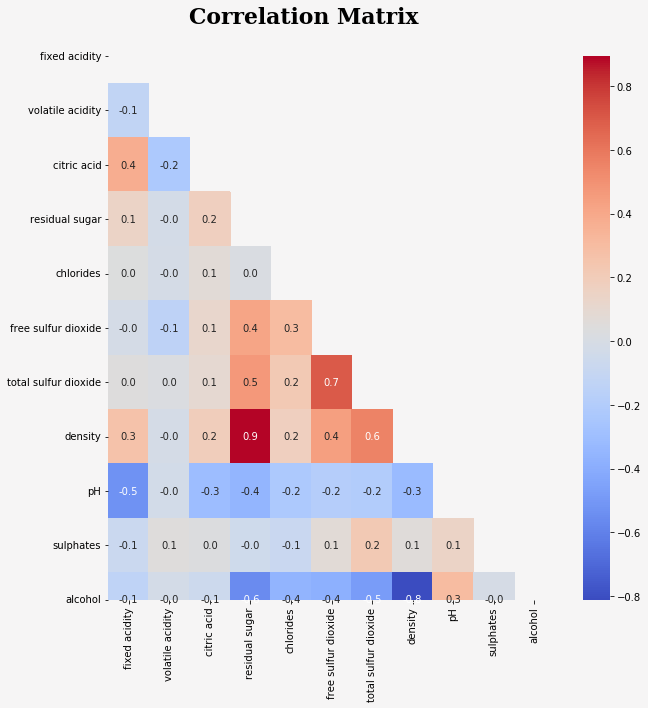

In [14]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 

df_corr = X.corr().transpose()
mask = np.triu(np.ones_like(df_corr))
ax0.text(2,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap="coolwarm")
plt.show()

Following is the Correlation values for the each column including the output

In [15]:
corr = df.corr()
corr.transpose().loc[:, ["quality"]].sort_values(by="quality",ascending=False)

,quality
quality,1.000000
alcohol,0.444226
pH,0.203490
sulphates,0.072498
citric acid,0.007801
free sulfur dioxide,-0.058428
volatile acidity,-0.153458
fixed acidity,-0.188402
residual sugar,-0.193623
total sulfur dioxide,-0.193786


Text(0, 0.5, '')

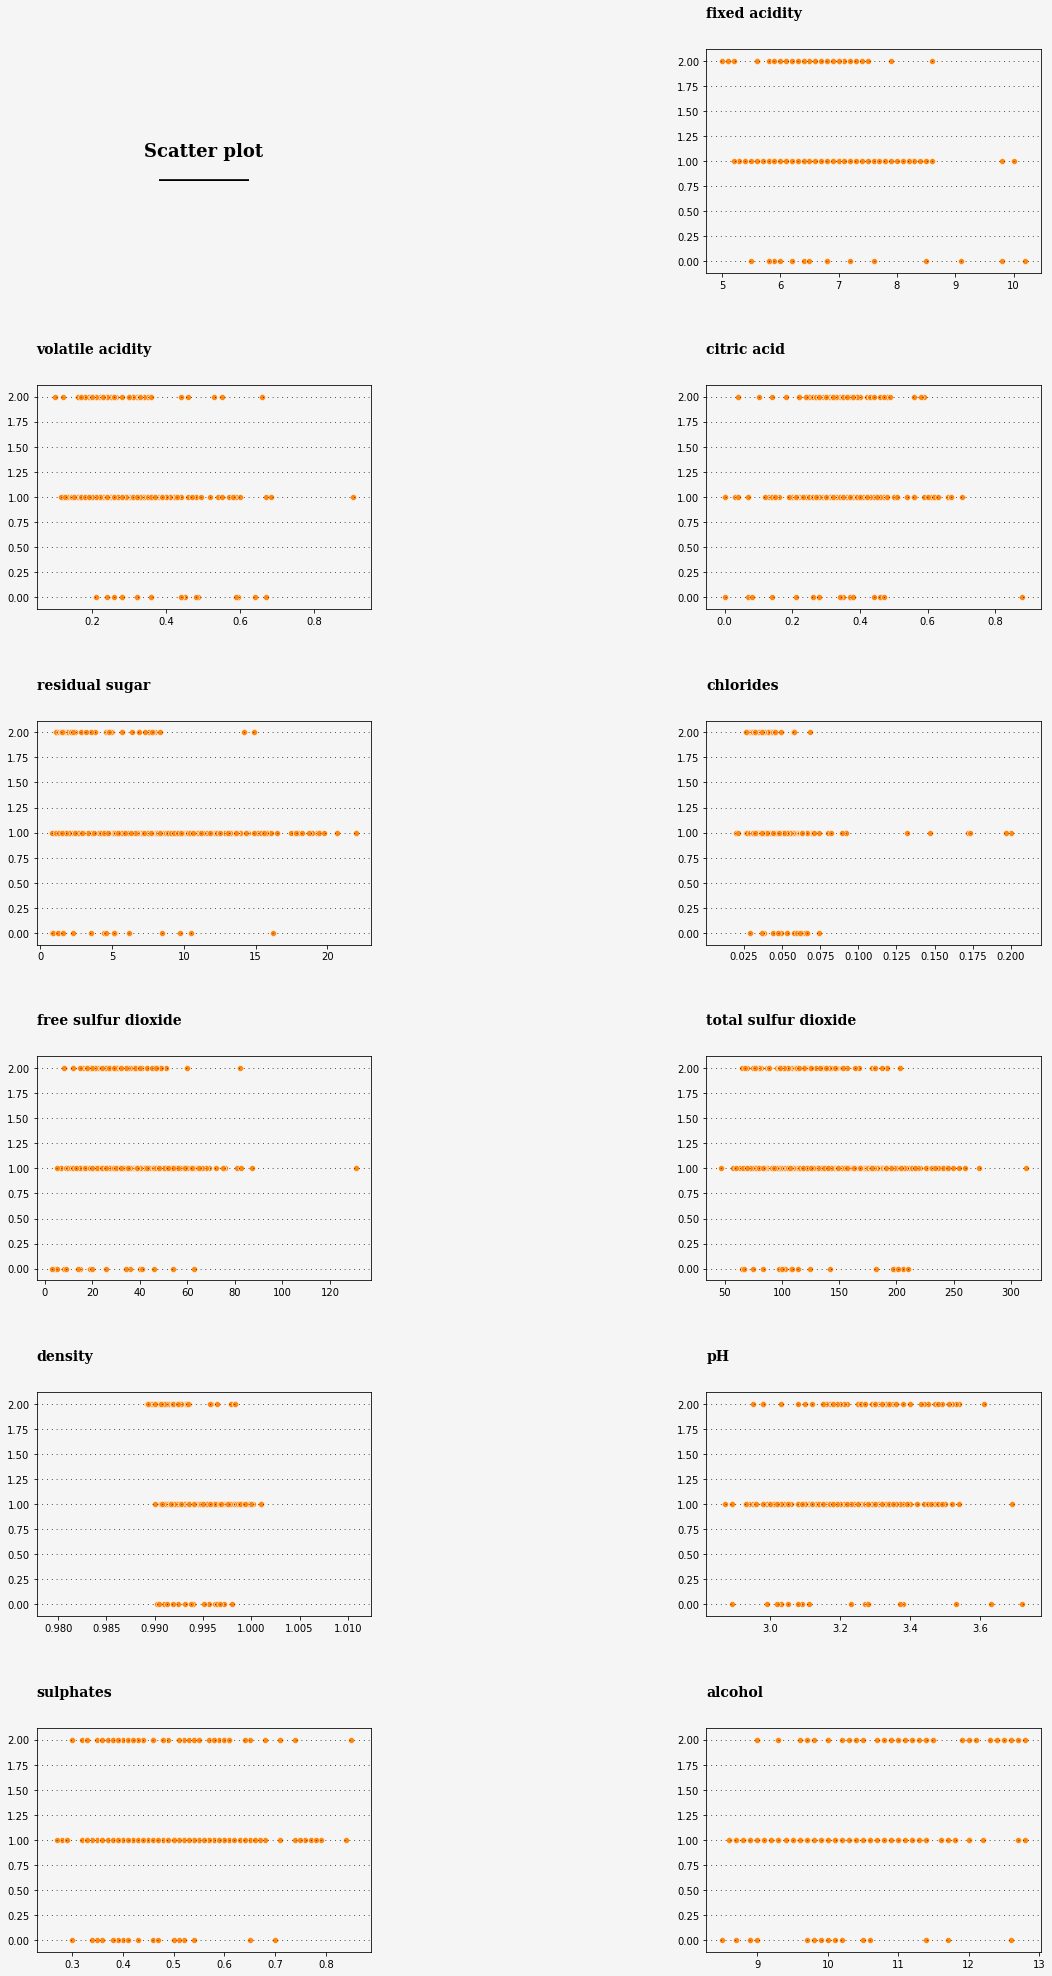

In [16]:
fig = plt.figure(figsize=(18,35))
gs = fig.add_gridspec(6,2)
gs.update(wspace=1, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
ax10 = fig.add_subplot(gs[5,0])
ax11 = fig.add_subplot(gs[5,1])

background_color = "#f6f5f5"
color_palette = ["#FA5458","#FDD563","#5F63F1"]

fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color) 
ax9.set_facecolor(background_color) 
ax10.set_facecolor(background_color) 
ax11.set_facecolor(background_color) 


# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Scatter plot\n__________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.scatterplot(ax=ax1,x='fixed acidity',y='quality',data=df,color= "#ff8811")
Xstart, Xend = ax1.get_xlim()
Ystart, Yend = ax1.get_ylim()
ax1.text(Xstart, Yend+(Yend*0.15), 'fixed acidity', fontsize=14, fontweight='bold', fontfamily='serif')
ax1.set_xlabel("")
ax1.set_ylabel("")

ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.scatterplot(ax=ax2,x='volatile acidity',y='quality',data=df,color= "#ff8811")
Xstart, Xend = ax2.get_xlim()
Ystart, Yend = ax2.get_ylim()
ax2.text(Xstart, Yend+(Yend*0.15), 'volatile acidity', fontsize=14, fontweight='bold', fontfamily='serif')
ax2.set_xlabel("")
ax2.set_ylabel("")

ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.scatterplot(ax=ax3,x='citric acid',y='quality',data=df,color= "#ff8811")
Xstart, Xend = ax3.get_xlim()
Ystart, Yend = ax3.get_ylim()
ax3.text(Xstart, Yend+(Yend*0.15), 'citric acid', fontsize=14, fontweight='bold', fontfamily='serif')
ax3.set_xlabel("")
ax3.set_ylabel("")

ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.scatterplot(ax=ax4,x='residual sugar',y='quality',data=df,color= "#ff8811")
Xstart, Xend = ax4.get_xlim()
Ystart, Yend = ax4.get_ylim()
ax4.text(Xstart, Yend+(Yend*0.15), 'residual sugar', fontsize=14, fontweight='bold', fontfamily='serif')
ax4.set_xlabel("")
ax4.set_ylabel("")

ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.scatterplot(ax=ax5,x='chlorides',y='quality',data=df,color= "#ff8811")
Xstart, Xend = ax5.get_xlim()
Ystart, Yend = ax5.get_ylim()
ax5.text(Xstart, Yend+(Yend*0.15), 'chlorides', fontsize=14, fontweight='bold', fontfamily='serif')
ax5.set_xlabel("")
ax5.set_ylabel("")

ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.scatterplot(ax=ax6,x='free sulfur dioxide',y='quality',data=df,color= "#ff8811")
Xstart, Xend = ax6.get_xlim()
Ystart, Yend = ax6.get_ylim()
ax6.text(Xstart, Yend+(Yend*0.15), 'free sulfur dioxide', fontsize=14, fontweight='bold', fontfamily='serif')
ax6.set_xlabel("")
ax6.set_ylabel("")

ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.scatterplot(ax=ax7,x='total sulfur dioxide',y='quality',data=df,color= "#ff8811")
Xstart, Xend = ax7.get_xlim()
Ystart, Yend = ax7.get_ylim()
ax7.text(Xstart, Yend+(Yend*0.15), 'total sulfur dioxide', fontsize=14, fontweight='bold', fontfamily='serif')
ax7.set_xlabel("")
ax7.set_ylabel("")

ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.scatterplot(ax=ax8,x='density',y='quality',data=df,color= "#ff8811")
Xstart, Xend = ax8.get_xlim()
Ystart, Yend = ax8.get_ylim()
ax8.text(Xstart, Yend+(Yend*0.15), 'density', fontsize=14, fontweight='bold', fontfamily='serif')
ax8.set_xlabel("")
ax8.set_ylabel("")

ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.scatterplot(ax=ax9,x='pH',y='quality',data=df,color= "#ff8811")
Xstart, Xend = ax9.get_xlim()
Ystart, Yend = ax9.get_ylim()
ax9.text(Xstart, Yend+(Yend*0.15), 'pH', fontsize=14, fontweight='bold', fontfamily='serif')
ax9.set_xlabel("")
ax9.set_ylabel("")

ax10.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.scatterplot(ax=ax10,x='sulphates',y='quality',data=df,color= "#ff8811")
Xstart, Xend = ax10.get_xlim()
Ystart, Yend = ax10.get_ylim()
ax10.text(Xstart, Yend+(Yend*0.15), 'sulphates', fontsize=14, fontweight='bold', fontfamily='serif')
ax10.set_xlabel("")
ax10.set_ylabel("")

ax11.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.scatterplot(ax=ax11,x='alcohol',y='quality',data=df,color= "#ff8811")
Xstart, Xend = ax11.get_xlim()
Ystart, Yend = ax11.get_ylim()
ax11.text(Xstart, Yend+(Yend*0.15), 'alcohol', fontsize=14, fontweight='bold', fontfamily='serif')
ax11.set_xlabel("")
ax11.set_ylabel("")

There's neither any correlation between different features nor any visibe relationship between features and *quality* target.

In [17]:
print(df.shape)
print(X.shape)
print(y.shape)

(400, 12)
(400, 11)
(400,)


So, as we had seen previously that it will completely reduced our dataset if we just removing the outliers, that can be helpful to us in case of reducing the training data

In [18]:
new_df = df.drop(df[df["fixed acidity"] >= 10.3 ].index)
new_df = df.drop(df[df["volatile acidity"] >= 0.90552].index)
new_df = df.drop(df[df["citric acid"] >= 1].index)
new_df = df.drop(df[df["residual sugar"] >= 49.05].index)
new_df = df.drop(df[df["chlorides"] >= 0.245].index)
new_df = df.drop(df[df["free sulfur dioxide"] >= 124.412].index)
new_df = df.drop(df[df["total sulfur dioxide"] >=303.46].index)

cond_den_1 = df["density"] >= 1.024935
cond_den_2 = df["density"] <= 0.991
new_df = df.drop(df[cond_den_1 | cond_den_2].index)

cond_ph_1 = df["pH"] >= 3.8
cond_ph_2 = df["pH"] <= 2.8
new_df = df.drop(df[cond_ph_1 | cond_ph_2].index)

new_df = df.drop(df[df["sulphates"] >= 0.98103].index)
new_df = df.drop(df[df["alcohol"] >= 14].index)

print("Shape after removing the outliers...")
new_df.shape

Shape after removing the outliers...


(400, 12)

Scalling these high data

In [19]:
scaler = RobustScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 42)
print("The shape after train/test split and scaling...")
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

The shape after train/test split and scaling...
(360, 11)
(40, 11)
(360,)
(40,)


Dictionary for accuracy

In [20]:
models_accuracy = dict() # initialising an empty dictionary to add all the models' accuracy scores
print(models_accuracy)

{}


In [21]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_proba = logreg.predict_proba(X_test)
y_pred = np.argmax(y_pred_proba,axis=1)
models_accuracy["Logistic Regression"] = accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))
print(y_pred)
print(y_test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.91      0.95        34
           2       0.75      1.00      0.86         6

    accuracy                           0.93        40
   macro avg       0.58      0.64      0.60        40
weighted avg       0.96      0.93      0.94        40

[1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1]
[1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 0 2 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1]


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


KNeighbours Classifier


In [22]:
param_grid = {'n_neighbors':np.arange(1,50), 'weights':['uniform','distance'], 'leaf_size':np.arange(1,10)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train, y_train)
y_pred = knn_cv.predict(X_test)
print(y_pred)
print(knn_cv.best_params_)
print(knn_cv.best_score_)
models_accuracy["KNN"] = accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 2 1]
{'leaf_size': 1, 'n_neighbors': 9, 'weights': 'distance'}
0.85
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.94      0.88      0.91        33
           2       0.62      0.71      0.67         7

    accuracy                           0.85        40
   macro avg       0.52      0.53      0.52        40
weighted avg       0.88      0.85      0.86        40



C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Decision tree

In [23]:
param_grid  = {"max_depth":np.arange(2,10), "min_samples_leaf":np.arange(0.02, 0.1), "max_features":[0.2,0.4,0.6,0.8]}
dt = DecisionTreeClassifier()
grid_dt = GridSearchCV(estimator = dt,
                      param_grid = param_grid,
                      scoring="accuracy",
                      cv=10,
                      n_jobs=-1)
grid_dt.fit(X_train, y_train)
y_pred = grid_dt.predict(X_test)
print(y_pred)
print(grid_dt.best_params_)
print(grid_dt.best_score_)
models_accuracy["Decision Trees"] = accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

[1 2 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1
 1 1 1]
{'max_depth': 8, 'max_features': 0.2, 'min_samples_leaf': 0.02}
0.7972222222222223
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.87      0.79      0.83        34
           2       0.25      0.33      0.29         6

    accuracy                           0.73        40
   macro avg       0.37      0.38      0.37        40
weighted avg       0.78      0.72      0.75        40



C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


random Forest

In [24]:
params_rf = {'n_estimators':[100,200,300,400,500],
            'max_depth':[4,6,8,10,12,14],
            'max_features':['log2','sqrt']}
rf = RandomForestClassifier()
grid_rf = GridSearchCV(estimator = rf,
                      param_grid = params_rf,
                      cv=3,
                      scoring = 'neg_mean_squared_error',
                      verbose = 1,
                      n_jobs = -1)
grid_rf.fit(X_train, y_train)
y_pred = grid_rf.predict(X_test)
print(y_pred)
print(grid_rf.best_params_)
print(grid_rf.best_score_)
models_accuracy["Random Forest"] = accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   16.8s finished
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[1 2 1 1 2 1 1 1 1 1 1 1 1 0 1 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 2 1]
{'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 100}
-0.17222222222222222
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.94      0.91      0.92        32
           2       0.75      0.86      0.80         7

    accuracy                           0.88        40
   macro avg       0.56      0.59      0.57        40
weighted avg       0.88      0.88      0.88        40



In [25]:
# voting Classifier
classifiers = [('Logistic Regression',logreg),
              ('K Nearest Neighbors', knn),
              ('Classification Tree', dt)]
for clf_name,clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf_name, accuracy_score(y_test,y_pred))
vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
print(y_pred)
models_accuracy["Voting Classifier"] = accuracy_score(y_pred,y_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_pred,y_test))

Logistic Regression 0.925
K Nearest Neighbors 0.775
Classification Tree 0.825
[1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 1 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1]
0.875
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.94      0.91      0.92        32
           2       0.75      0.75      0.75         8

    accuracy                           0.88        40
   macro avg       0.56      0.55      0.56        40
weighted avg       0.90      0.88      0.89        40



C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWar

In [26]:
# Model performance 
models_accuracy

{'Logistic Regression': 0.925,
 'KNN': 0.85,
 'Decision Trees': 0.725,
 'Random Forest': 0.875,
 'Voting Classifier': 0.875}

In [27]:
model = []
accuracy = []
for index,col in enumerate(models_accuracy):
    model.append(col)
    accuracy.append(models_accuracy[col])
print(model)
print(accuracy)

['Logistic Regression', 'KNN', 'Decision Trees', 'Random Forest', 'Voting Classifier']
[0.925, 0.85, 0.725, 0.875, 0.875]


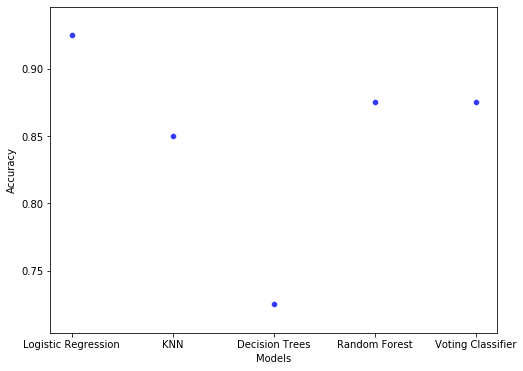

In [28]:
acc = pd.DataFrame({"Models":model, "Accuracy":accuracy})
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Models', y='Accuracy', data=acc, color='#3339FF',cmap=True)
plt.show()